#### Descripción

El CDC (centro de control y prevención de enfermedades) de EE. UU. es la entidad encargada de monitorear la salud pública y desarrollar estrategias para la prevención y control de enfermedades. Por esto ha contratado a nuestra consultora para organizar, en base a los datos recolectados, los recursos hospitalarios para prevenir que lo ocurrido durante la pandemia COVID-19 suceda de vuelta.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime
from datetime import timedelta
import matplotlib.dates as mdates

pd.set_option('display.float_format', lambda x: '%.2f' % x)


Para obtener los datos de usa el archivo .CSV, se lo descarga directamente desde https://dev.socrata.com/foundry/healthdata.gov/g62h-syeh

In [3]:
df = pd.read_csv('https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD&api_foundry=true')
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47909 entries, 0 to 47908
Columns: 135 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: float64(77), int64(56), object(2)
memory usage: 49.3+ MB


In [4]:
df.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,ID,2020/12/22,6,42,1,7,41,1,5.00,48,...,0.00,0,0.00,0,0.00,0,75.00,48,229.00,48
1,VT,2020/10/16,1,15,1,1,15,1,0.00,16,...,0.00,0,0.00,0,0.00,1,19.00,1,33.00,1
2,AR,2020/10/14,34,68,4,40,60,6,8.00,103,...,0.00,0,0.00,0,0.00,92,220.00,98,386.00,89
3,VI,2020/10/13,1,1,0,2,0,0,0.00,2,...,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0
4,VI,2020/10/12,1,1,0,2,0,0,0.00,2,...,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0


1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

In [5]:
df1 = df[df['date'] < '2020/07/01'].sort_values('date')


In [6]:
df1['date'].min()

'2020/01/01'

In [7]:
df1['date'].max()

'2020/06/30'

Se utiliza la columna inpatient_beds_used_covid que corresponde a pacientes informados actualmente hospitalizados en una cama para pacientes hospitalizados que tienen sospecha o confirmación de COVID-19

In [8]:
df1 = pd.DataFrame(df1, columns = ['state',
                                    'inpatient_beds_used_covid',
                                    'total_adult_patients_hospitalized_confirmed_covid',
                                    'total_pediatric_patients_hospitalized_confirmed_covid'])


df1 = df1.groupby(by='state',as_index=False).sum().sort_values(by="inpatient_beds_used_covid",ascending=False).iloc[0:5].reset_index().drop(columns='index')
df1


,state,inpatient_beds_used_covid,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid
0,NY,686528.00,87.00,0.00
1,CA,434721.00,36134.00,0.00
2,FL,322227.00,0.00,0.00
3,TX,246237.00,0.00,0.00
4,IL,214010.00,0.00,0.00


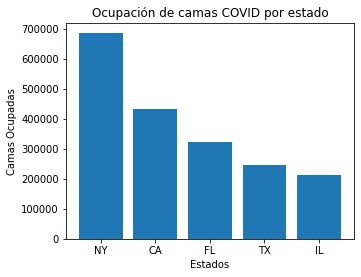

In [9]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0,0,1,1])
x=df1['state'].values.astype(str)
y=df1['inpatient_beds_used_covid']
ax.bar(x,y)
ax.set_xlabel('Estados')
ax.set_ylabel('Camas Ocupadas')
ax.set_title('Ocupación de camas COVID por estado')

plt.show()

2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:

- Intervalos de crecimiento y decrecimiento
- Puntos críticos (mínimos y máximos)

In [10]:
df2 = df[(df['state'] == 'NY') & (df['date'] < '2020/07/01')].sort_values('date')
df2 = pd.DataFrame(df2, columns = ['state',
                                    'date',
                                    'inpatient_beds_used_covid'])
var = df2['inpatient_beds_used_covid'] / df2['inpatient_beds_used_covid'].shift(1) - 1  # variacion diaria
df2['variacion'] = np.around(var,2)
df2 = df2.fillna(0)

La fecha en que más ocupación de camas por COVID fue

In [16]:
a = df2[df2['inpatient_beds_used_covid'] == df2['inpatient_beds_used_covid'].max()].reset_index().drop(columns=['state','index'])
a = a.rename(columns={'date':'Fecha','inpatient_beds_used_covid':'Camas COVID','variacion':'Variación Diaria'})


,Fecha,Camas COVID,Variación Diaria
0,2020/04/14,14126.00,0.02


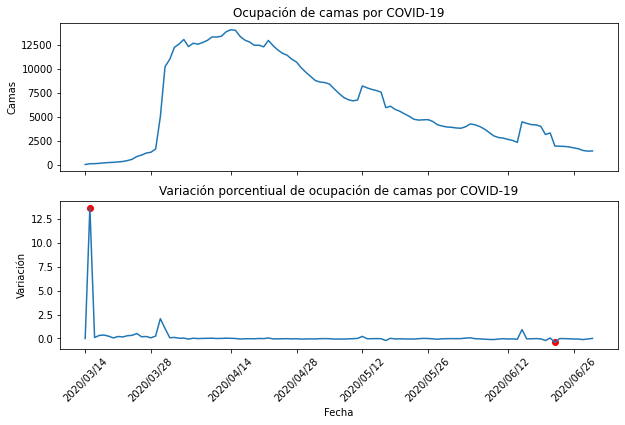

In [ ]:
from turtle import color


x = df2.date.values
y1 = df2.inpatient_beds_used_covid.values
y2 = df2.variacion.values
max_val = df2[df2['variacion'] == df2['variacion'].max()]
min_val = df2[df2['variacion'] == df2['variacion'].min()]
fig, ax = plt.subplots(2, figsize=(10, 6),
           sharex='col', sharey='row')
ax[0].plot(x, y1)
ax[0].set(ylabel='Camas',
       title='Ocupación de camas por COVID-19')
ax[1].plot(x, y2)
ax[1].scatter(max_val['date'].values,max_val['variacion'].values,color='r')
ax[1].scatter(min_val['date'].values,min_val['variacion'].values,color='r')

ax[1].set(xlabel='Fecha', ylabel='Variación',
       title='Variación porcentiual de ocupación de camas por COVID-19')

ax[1].xaxis.set_major_locator(mdates.AutoDateLocator())
ax[1].tick_params(axis='x', labelrotation=45)

plt.show()

In [ ]:
a = max_val.date.values.tolist()
a[0]


'2020/03/15'

In [ ]:
max_val.variacion.values.tolist()

[13.67]

3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

In [ ]:
df3 = df[df['date'] < '2021/01/01'].sort_values('date')
df3 = pd.DataFrame(df3, columns = ['state',
                                    'staffed_adult_icu_bed_occupancy',
                                    'staffed_pediatric_icu_bed_occupancy'])
df3['Total'] = df3['staffed_adult_icu_bed_occupancy'] + df3['staffed_pediatric_icu_bed_occupancy']
df3 = df3.groupby(by='state',as_index=False).sum().sort_values(by="staffed_adult_icu_bed_occupancy",ascending=False).iloc[0:5].reset_index().drop(columns='index')
df3

,state,staffed_adult_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy,Total
0,TX,991193.00,55836.00,1047029.00
1,CA,901684.00,221527.00,1123211.00
2,FL,799387.00,96279.00,895666.00
3,NY,495339.00,137922.00,633261.00
4,PA,465537.00,102167.00,567704.00


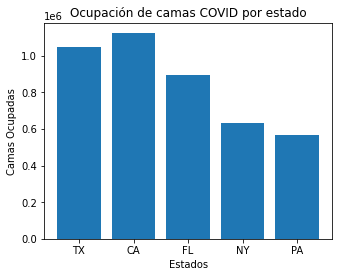

In [ ]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0,0,1,1])
x=df3.state.values
y=df3['Total'].values
ax.bar(x,y)
ax.set_xlabel('Estados')
ax.set_ylabel('Camas Ocupadas')
ax.set_title('Ocupación de camas COVID por estado')

plt.show()

4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

In [ ]:
df4 = df[df['date'] < '2021/01/01'].sort_values('date')
df4 = pd.DataFrame(df4, columns = ['state',
                                    'total_pediatric_patients_hospitalized_confirmed_covid',
                                    'staffed_icu_pediatric_patients_confirmed_covid'])
df4 = df4.groupby(by='state',as_index=False).sum().sort_values(by="total_pediatric_patients_hospitalized_confirmed_covid",ascending=False).reset_index().drop(columns='index')
df4.state

0     TX
1     CA
2     FL
3     AZ
4     PA
5     IL
6     GA
7     NY
8     TN
9     OK
10    CO
11    OH
12    MO
13    AL
14    NC
15    MN
16    NE
17    NJ
18    VA
19    SD
20    MI
21    AR
22    IN
23    MA
24    SC
25    KY
26    RI
27    MD
28    NV
29    WV
30    PR
31    UT
32    DC
33    MS
34    WA
35    LA
36    IA
37    WI
38    CT
39    KS
40    DE
41    ID
42    OR
43    NM
44    ND
45    AK
46    MT
47    ME
48    HI
49    NH
50    WY
51    VI
52    VT
Name: state, dtype: object

5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.



In [ ]:
df5 = df.sort_values('date')
df5 = pd.DataFrame(df, columns = ['state',
                                    'staffed_pediatric_icu_bed_occupancy',
                                    'staffed_adult_icu_bed_occupancy',
                                    'staffed_icu_pediatric_patients_confirmed_covid',
                                    'staffed_icu_adult_patients_confirmed_covid'])
df5['Total_camas_uci_ocupadas'] = df5['staffed_pediatric_icu_bed_occupancy'] + df5['staffed_adult_icu_bed_occupancy']
df5['Total_camas_uci_covid_ocupadas'] = df5['staffed_icu_pediatric_patients_confirmed_covid'] + df5['staffed_icu_adult_patients_confirmed_covid']
df5 = df5.groupby(by='state').sum().sort_values(by="staffed_adult_icu_bed_occupancy",ascending=False).reset_index()
df5.head()

,state,staffed_pediatric_icu_bed_occupancy,staffed_adult_icu_bed_occupancy,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_covid,Total_camas_uci_ocupadas,Total_camas_uci_covid_ocupadas
0,TX,477433.00,4427230.00,4779.00,1145608.00,4904663.00,1150387.00
1,CA,1170638.00,4031911.00,7275.00,901228.00,5202549.00,908503.00
2,FL,653232.00,3764364.00,3776.00,694234.00,4417596.00,698010.00
3,NY,588908.00,2531611.00,3378.00,398737.00,3120519.00,402115.00
4,PA,560267.00,2126500.00,1739.00,339238.00,2686767.00,340977.00


In [ ]:
df5 = pd.DataFrame(df5, columns = ['state',
                                    'Total_camas_uci_ocupadas',
                                    'Total_camas_uci_covid_ocupadas'])
df5['Porcentaje_camas__uci_covid'] = df5['Total_camas_uci_covid_ocupadas'] / df5['Total_camas_uci_ocupadas']
total_uci = df5['Total_camas_uci_ocupadas'].sum()
total_uci_covid = df5['Total_camas_uci_covid_ocupadas'].sum()
porcentaje = round(100*total_uci_covid/total_uci,2)
porcentaje

17.45

6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?



In [ ]:
df6 = df[(df['date'] > '2020/12/31') & (df['date'] < '2022/01/01')].sort_values('date')
df6 = pd.DataFrame(df6, columns = ['state',
                                    'deaths_covid'])
df6 = df6.groupby(by='state',as_index=False).sum().sort_values(by="deaths_covid",ascending=False).reset_index().drop(columns='index')
df6.head()

,state,deaths_covid
0,CA,35108.00
1,TX,32889.00
2,FL,26004.00
3,NY,17620.00
4,AZ,16250.00


7 - ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?

In [ ]:
df7 = df[(df['date'] > '2020/12/31') & (df['date'] < '2022/01/01')].sort_values('date')
df7 = pd.DataFrame(df7, columns = ['date',
                                    'deaths_covid',
                                    'critical_staffing_shortage_today_yes'])

df7 = df7.groupby(by='date', as_index=False).sum()


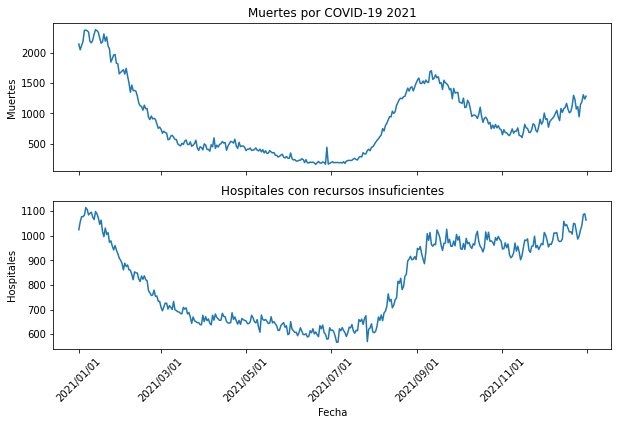

In [ ]:
x1 = df7.deaths_covid.values
x2 = df7.critical_staffing_shortage_today_yes.values
y = df7.date.values
fig, ax = plt.subplots(2, figsize=(10, 6),
           sharex='col', sharey='row')
ax[0].plot(y, x1)
ax[0].set(ylabel='Muertes',
       title='Muertes por COVID-19 2021')
ax[1].plot(y, x2)
ax[1].set(xlabel='Fecha', ylabel='Hospitales',
       title='Hospitales con recursos insuficientes')
ax[1].xaxis.set_major_locator(mdates.AutoDateLocator())
ax[1].tick_params(axis='x', labelrotation=45)
plt.show()

8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.



In [ ]:
df8 = pd.DataFrame(df, columns = ['date',
                                    'deaths_covid',
                                    'critical_staffing_shortage_today_yes']).sort_values('date')
df8['month_year'] = pd.to_datetime(df8['date']).dt.to_period('M')
df8['month_year'].astype(str)
df8 = df8.groupby(by='month_year', as_index=False).sum()
df8.head()


,month_year,deaths_covid,critical_staffing_shortage_today_yes
0,2020-01,145.00,80
1,2020-02,0.00,0
2,2020-03,1118.00,0
3,2020-04,33572.00,30
4,2020-05,54884.00,6


Peor mes por cantidad de muertes

In [ ]:
df8.sort_values(by="deaths_covid",ascending=False).reset_index().drop(columns='index').iloc[0:1]

,month_year,deaths_covid,critical_staffing_shortage_today_yes
0,2021-01,66020.00,31865


Peor mes por falta de recursos hospitalarios

In [ ]:
df8.sort_values(by="critical_staffing_shortage_today_yes",ascending=False).reset_index().drop(columns='index').iloc[0:1]

,month_year,deaths_covid,critical_staffing_shortage_today_yes
0,2020-12,56674.00,37456


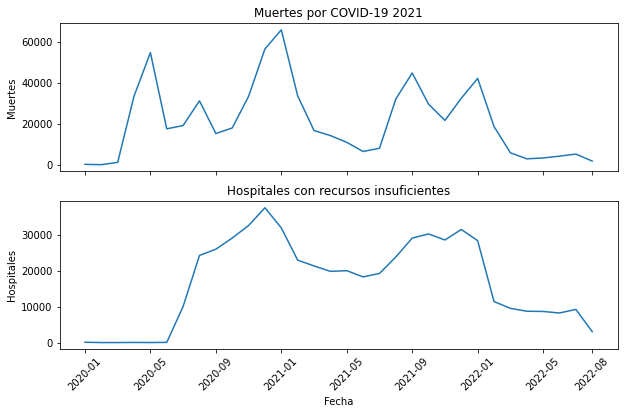

In [ ]:
x1 = df8.deaths_covid.values
x2 = df8.critical_staffing_shortage_today_yes.values
y = df8['month_year'].astype(str)


fig, ax = plt.subplots(2, figsize=(10, 6),
           sharex='col', sharey='row')
ax[0].plot(y, x1)
ax[0].set(ylabel='Muertes',
       title='Muertes por COVID-19 2021')
ax[1].plot(y, x2)
ax[1].set(xlabel='Fecha', ylabel='Hospitales',
       title='Hospitales con recursos insuficientes')
ax[1].xaxis.set_major_locator(mdates.AutoDateLocator())
ax[1].tick_params(axis='x', labelrotation=45)
plt.show()

9 - ¿Qué recomendaciones haría, ex post, con respecto a los recursos hospitalarios y su uso?



Las curvas de muertes por COVID-19 y de cantidad de unidades médicas que reportan escasez de recursos están altamente relacionadas, en este caso el mes con mayor cantidad de muertes reportadas fue en 01-2021 mientras que la cantidad de unidades médicas que reportaron escasez de recursos hospitalarios alcanzó su pico el mes anterior, 12-2020, por lo que se recomienda mejorar el equipamento de las unidades médicas y dotarlas de mayores y mejores recursos para evitar que aumente la cantidad de muertes por COVID-19.

In [ ]:
https://pe.usps.com/text/pub28/28apb.htm # estados que no se encuentran dentro de state code, son zip code